### Prediction of Disease through PCA and K-Nearest Neighbors

This workflow will take the inital dataset, add categorical information, and reduce dimensionality through PCA.  Then the dataset with be trained and tested with a logistic regression model and the specificity and sensitivity will be analyzed.

In [153]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import matplotlib
matplotlib.style.use('ggplot')

pd.options.display.max_columns = 100
df = pd.read_csv('crohns.csv', index_col='ID_REF')

In [154]:
df.head()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.382661,6.589557,6.608669,6.397301,6.231299,5.929730,6.074643,6.526892,6.729527,6.045421,6.331441,6.274374,6.496154,6.358507,6.158130,6.496644,6.185766,6.169309,6.598857,6.261507,6.359359,6.331351,6.285030,6.501876,5.735505,6.319850,6.073757,6.479443,6.193996,6.523940,6.071335,5.913494,6.774238,6.310667,6.040967,6.018622,6.078189,6.115689,5.697258,6.357936,6.110460,6.437110,6.412185,6.064644,6.470831,6.857042,5.769459,6.412313,6.249727,6.720460,...,6.858734,5.962292,6.253489,6.238440,6.537258,6.285958,6.027515,6.298321,6.335009,5.976928,5.946522,6.297048,6.756208,6.661990,6.524403,6.522643,6.119776,6.725851,5.904653,6.303294,6.634581,6.729989,5.935937,6.310515,6.129484,6.377719,5.941845,6.149118,6.095989,6.186103,6.123071,5.856623,6.015983,6.414365,5.842242,5.961018,5.633461,6.408309,6.173188,6.348845,6.202164,6.425718,6.323964,6.301666,6.402520,6.561243,5.743080,6.459312,6.385285,6.145335
1053_at,5.871326,4.878061,5.449387,4.899039,4.584867,5.209132,4.693102,3.977666,4.566600,5.102809,4.959941,5.079732,4.591336,4.912968,4.396805,4.477802,4.526972,5.213776,5.215913,4.785458,5.276424,5.229924,4.878334,4.641271,5.129132,4.751195,4.821506,4.894714,5.312187,4.831496,4.361319,4.254259,5.485159,4.607696,4.972134,5.006505,4.874971,5.293084,5.389189,5.310517,3.878980,5.001949,4.990839,4.689582,5.066674,4.953094,5.113617,5.435301,5.173542,4.788608,...,4.496257,4.802902,4.659385,5.136380,4.742369,4.846875,5.174210,5.244204,4.700032,4.502854,4.613833,4.410685,4.834576,4.861338,4.492312,4.561338,5.161655,4.407452,5.492558,4.627019,5.270660,4.250016,4.837356,5.021156,4.918464,4.475635,3.809461,4.415784,5.198838,4.745639,5.067949,4.559183,4.888661,5.824860,4.639751,4.328384,4.652291,4.525446,4.742527,4.542567,4.018870,4.869823,4.594830,4.692336,5.042849,4.782566,4.753444,5.138295,4.618365,4.353786
117_at,5.835663,5.921491,6.736059,6.043868,5.958280,5.852238,6.581454,5.679843,6.073959,5.858080,5.883117,5.993516,6.186025,5.996046,5.851926,6.456817,6.425097,5.869971,6.628892,5.933291,5.419400,6.160361,5.619221,5.778860,6.330025,5.574331,4.630328,5.605788,5.257950,4.449917,5.034140,5.400625,5.441565,5.668221,5.219335,5.599813,6.539672,7.018696,6.411289,5.802769,5.120004,5.266599,4.974462,4.852375,5.417188,8.170643,6.989161,5.623533,5.751630,4.680720,...,6.248449,5.370894,6.230972,5.870897,5.671046,6.377512,5.544193,6.102169,5.630438,6.135886,6.011312,5.361476,6.324106,6.443518,6.117733,5.428021,5.566092,6.977216,5.833707,6.524963,6.814857,6.619354,5.297264,6.242569,5.942064,5.977965,5.202133,5.999923,5.494490,5.771217,5.683317,5.791413,5.327446,5.746793,5.558513,6.360571,5.869865,5.677152,5.609986,6.125023,5.425782,5.182849,5.534319,5.654300,5.712656,6.079347,5.873668,5.945533,5.981726,5.419848
121_at,8.103100,8.443505,8.494700,7.895723,7.946928,8.134139,8.011350,8.199173,8.511109,8.347532,8.157562,8.136901,8.345359,8.184977,8.033005,8.035576,7.738157,8.068512,8.053709,8.067641,8.114891,8.031708,8.101416,8.153414,7.781820,7.955671,8.326602,

In [155]:
#  Transpose dataframe to make genes the features and add categorical data of UC, CD, and NM

df_t = df.T
df_t.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,200020_at,200021_at,200022_at,200023_s_at,200024_at,200025_s_at,200026_at,200027_at,200028_s_at,200029_at,...,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,!series_matrix_table_end
GSM76030,6.382661,5.871326,5.835663,8.103100,3.529799,7.492383,4.791131,1.961087,9.284626,1.925061,3.581839,6.214622,5.859110,6.852490,6.765528,6.087171,4.298811,4.256098,7.536217,5.798628,8.620822,9.791745,11.834602,12.669051,10.872948,10.292415,10.345631,10.645182,9.005625,9.942618,12.217074,7.520121,12.144758,12.108471,9.180424,8.333575,11.829161,12.233899,12.252235,12.430847,8.886568,10.803180,12.393032,11.346954,11.915456,12.172578,12.446742,8.837930,8.086018,12.101253,...,7.137950,4.116503,5.565544,5.582836,7.967987,7.417954,6.352502,2.644662,1.155077,1.394372,4.920347,9.503307,10.606108,1.678498,0.161588,-0.541828,5.718410,6.977716,7.829251,2.367110,2.457372,1.861291,3.423217,2.523174,1.610606,2.181349,4.058743,3.556321,12.002831,9.996016,11.806078,9.536606,7.808093,12.255440,-0.149810,7.691930,7.523365,6.759961,8.867854,6.618826,6.772599,9.139745,11.263042,1.599166,2.992996,0.842147,-0.593707,1.419971,-0.406466,0.0
GSM76031,6.589557,4.878061,5.921491,8.443505,3.434311,7.523480,5.691385,2.017142,10.521182,4.738377,5.031096,6.773676,7.105315,7.477063,7.519966,5.978473,4.072635,4.799804,7.675697,6.206278,8.000494,10.119121,11.000942,12.402118,10.757379,9.268689,10.268498,10.218191,8.278435,9.973495,12.069405,8.331984,11.880424,11.626703,8.973577,8.864366,11.630817,11.709738,12.103581,12.286003,7.268632,11.801158,11.824912,11.187173,11.284662,12.091435,11.983613,8.892188,9.016253,12.024419,...,6.907922,0.976077,4.072253,5.659583,6.717703,6.491562,6.098502,2.635418,1.096499,1.892544,4.344220,8.288436,8.513251,5.123195,1.195234,0.465478,5.552748,6.769131,7.302340,3.933223,3.015676,3.798275,2.642175,2.847760,0.771246,2.003625,5.397119,4.966129,11.779622,9.730404,12.011141,9.486894,7.624385,12.246286,1.146636,6.840819,6.386817,6.218056,7.382698,5.793376,6.529938,9.079049,11.074144,2.391370,1.870512,1.141420,0.159884,3.444175,1.197514,0.0
GSM76032,6.608669,5.449387,6.736059,8.494700,4.393491,7.974638,5.093344,3.429126,9.450795,3.994468,3.170683,7.018459,6.535379,7.389972,7.292100,7.037641,4.384642,5.282313,7.882565,5.728317,8.120956,10.375070,11.147276,12.661328,10.611468,9.633794,10.321648,10.064613,8.419144,10.153697,11.889602,8.331853,12.084040,11.423140,8.794230,8.752605,11.412683,11.189656,12.358859,12.297796,8.043408,12.316081,12.254213,11.227224,11.093967,12.012300,12.099628,9.052299,8.007048,12.081218,...,8.077159,3.686105,6.597276,6.942833,6.998143,6.277936,5.850655,3.601851,3.729112,1.445706,4.471469,9.878337,9.434238,3.574596,0

In [156]:
#construct three lists of disease types
UC = ['GSM76030', 'GSM76031', 'GSM76032', 'GSM76033', 'GSM76034', 'GSM76035', 'GSM76036', 'GSM76037', 'GSM76038', 'GSM76039',
     'GSM76040', 'GSM76041', 'GSM76042', 'GSM76043', 'GSM76044', 'GSM76045', 'GSM76046', 'GSM76047', 'GSM76048', 'GSM76049', 
     'GSM76050', 'GSM76051', 'GSM76052', 'GSM76053', 'GSM76054', 'GSM76055']

CD = ['GSM76056', 'GSM76057', 'GSM76058', 'GSM76059', 'GSM76060', 'GSM76061', 'GSM76062', 'GSM76063', 'GSM76064', 'GSM76065',
     'GSM76066', 'GSM76067', 'GSM76068', 'GSM76069', 'GSM76070', 'GSM76071', 'GSM76072', 'GSM76073', 'GSM76074', 'GSM76075',
     'GSM76076', 'GSM76077', 'GSM76078', 'GSM76079', 'GSM76080', 'GSM76081', 'GSM76082', 'GSM76083', 'GSM76084', 'GSM76085',
     'GSM76086', 'GSM76087', 'GSM76088', 'GSM76089', 'GSM76090', 'GSM76091', 'GSM76092', 'GSM76093', 'GSM76094', 'GSM76095',
     'GSM76096', 'GSM76097', 'GSM76098', 'GSM76099', 'GSM76100', 'GSM76101', 'GSM76102', 'GSM76103', 'GSM76104', 'GSM76105',
     'GSM76106', 'GSM76107', 'GSM76108', 'GSM76109', 'GSM76110', 'GSM76111', 'GSM76112', 'GSM76113', 'GSM76114']

NM = ['GSM76115', 'GSM76116', 'GSM76117', 'GSM76118', 'GSM76119', 'GSM76120', 'GSM76121', 'GSM76122', 'GSM76123', 'GSM76124', 
      'GSM76125', 'GSM76126', 'GSM76127', 'GSM76128', 'GSM76129', 'GSM76130', 'GSM76131', 'GSM76132', 'GSM76133', 'GSM76134', 
      'GSM76135', 'GSM76136', 'GSM76137', 'GSM76138', 'GSM76139', 'GSM76140', 'GSM76141', 'GSM76142', 'GSM76143', 'GSM76144', 
      'GSM76145', 'GSM76146', 'GSM76147', 'GSM76148', 'GSM76149', 'GSM76150', 'GSM76151', 'GSM76152', 'GSM76153', 'GSM76154', 
      'GSM76155', 'GSM76156']

In [157]:
# label disease type and add column as category, UC=0, CD=1, NM=2
disease_type = []
for items in UC:
    disease_type.append(0)

In [158]:
for items in CD:
    disease_type.append(1)

In [159]:
for items in NM:
    disease_type.append(2)

In [160]:
df_t['disease_type'] = disease_type

In [161]:
df_t['disease_type'].value_counts()

1    59
2    42
0    26
Name: disease_type, dtype: int64

In [162]:
df_t.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,200020_at,200021_at,200022_at,200023_s_at,200024_at,200025_s_at,200026_at,200027_at,200028_s_at,200029_at,...,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,!series_matrix_table_end,disease_type
GSM76030,6.382661,5.871326,5.835663,8.103100,3.529799,7.492383,4.791131,1.961087,9.284626,1.925061,3.581839,6.214622,5.859110,6.852490,6.765528,6.087171,4.298811,4.256098,7.536217,5.798628,8.620822,9.791745,11.834602,12.669051,10.872948,10.292415,10.345631,10.645182,9.005625,9.942618,12.217074,7.520121,12.144758,12.108471,9.180424,8.333575,11.829161,12.233899,12.252235,12.430847,8.886568,10.803180,12.393032,11.346954,11.915456,12.172578,12.446742,8.837930,8.086018,12.101253,...,4.116503,5.565544,5.582836,7.967987,7.417954,6.352502,2.644662,1.155077,1.394372,4.920347,9.503307,10.606108,1.678498,0.161588,-0.541828,5.718410,6.977716,7.829251,2.367110,2.457372,1.861291,3.423217,2.523174,1.610606,2.181349,4.058743,3.556321,12.002831,9.996016,11.806078,9.536606,7.808093,12.255440,-0.149810,7.691930,7.523365,6.759961,8.867854,6.618826,6.772599,9.139745,11.263042,1.599166,2.992996,0.842147,-0.593707,1.419971,-0.406466,0.0,0
GSM76031,6.589557,4.878061,5.921491,8.443505,3.434311,7.523480,5.691385,2.017142,10.521182,4.738377,5.031096,6.773676,7.105315,7.477063,7.519966,5.978473,4.072635,4.799804,7.675697,6.206278,8.000494,10.119121,11.000942,12.402118,10.757379,9.268689,10.268498,10.218191,8.278435,9.973495,12.069405,8.331984,11.880424,11.626703,8.973577,8.864366,11.630817,11.709738,12.103581,12.286003,7.268632,11.801158,11.824912,11.187173,11.284662,12.091435,11.983613,8.892188,9.016253,12.024419,...,0.976077,4.072253,5.659583,6.717703,6.491562,6.098502,2.635418,1.096499,1.892544,4.344220,8.288436,8.513251,5.123195,1.195234,0.465478,5.552748,6.769131,7.302340,3.933223,3.015676,3.798275,2.642175,2.847760,0.771246,2.003625,5.397119,4.966129,11.779622,9.730404,12.011141,9.486894,7.624385,12.246286,1.146636,6.840819,6.386817,6.218056,7.382698,5.793376,6.529938,9.079049,11.074144,2.391370,1.870512,1.141420,0.159884,3.444175,1.197514,0.0,0
GSM76032,6.608669,5.449387,6.736059,8.494700,4.393491,7.974638,5.093344,3.429126,9.450795,3.994468,3.170683,7.018459,6.535379,7.389972,7.292100,7.037641,4.384642,5.282313,7.882565,5.728317,8.120956,10.375070,11.147276,12.661328,10.611468,9.633794,10.321648,10.064613,8.419144,10.153697,11.889602,8.331853,12.084040,11.423140,8.794230,8.752605,11.412683,11.189656,12.358859,12.297796,8.043408,12.316081,12.254213,11.227224,11.093967,12.012300,12.099628,9.052299,8.007048,12.081218,...,3.686105,6.597276,6.942833,6.998143,6.277936,5.850655,3.601851,3.729112,1.445706,4.471469,9.878337,9.434238,3.574596,0.783106,0.592948,5.041390,5.805748,7.

In [163]:
df_t.tail()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,200020_at,200021_at,200022_at,200023_s_at,200024_at,200025_s_at,200026_at,200027_at,200028_s_at,200029_at,...,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,!series_matrix_table_end,disease_type
GSM76152,6.561243,4.782566,6.079347,8.461163,3.629811,7.388078,5.108291,1.955778,9.972435,4.507021,3.810852,7.009803,6.617812,7.205692,7.420362,6.354273,2.871741,5.402242,7.962644,5.676791,8.608025,10.201932,11.309347,12.759725,10.865285,9.890308,10.036796,10.454533,8.750543,10.092362,12.108953,8.398038,12.346103,11.857066,8.889201,8.568740,11.867088,11.789611,12.379203,12.323983,7.313809,11.950912,12.231787,11.428782,11.476191,12.277147,12.579187,8.771782,9.035556,12.398997,...,3.809104,5.575158,5.576072,6.052102,5.672625,5.124075,3.297530,0.010819,2.246435,4.271086,6.762801,8.037837,2.936365,1.083051,1.085231,5.556825,6.297930,7.056416,2.998285,2.239278,2.096163,3.850869,1.149994,3.835549,0.915396,4.937898,4.301077,11.792021,9.656569,12.031752,9.650195,7.605991,12.238202,2.625807,5.997548,5.761440,5.591900,6.448511,5.215222,6.148601,8.894958,11.085378,1.918510,1.795499,1.436011,0.498814,3.936864,0.334170,0.0,2
GSM76153,5.743080,4.753444,5.873668,7.881406,2.889205,6.845516,4.292894,1.535905,9.350730,3.494066,3.688278,6.452731,5.789277,6.670605,5.779832,5.984430,4.474088,4.532476,7.854056,5.255875,8.689767,9.615489,11.759898,12.725677,11.144566,10.083805,10.266455,10.572070,9.209724,10.224684,12.162404,7.815957,12.174215,12.094761,9.418849,8.850879,11.984159,11.939883,12.286319,12.321885,7.799915,11.489162,12.367946,11.037945,11.662186,12.147465,12.508489,9.405580,9.162164,12.137639,...,4.101426,6.435772,5.877239,6.623044,5.937087,5.890260,0.205753,-1.083163,0.191443,3.821512,7.798626,8.080573,1.691113,-0.634648,-0.913811,6.145800,7.196815,8.059274,2.507783,-1.373701,1.304835,2.536197,-2.139153,-0.722156,0.182330,3.858487,4.158349,12.148516,10.320248,11.978567,9.478526,8.113301,12.277424,0.000661,6.289322,5.490897,5.989195,7.335434,5.208524,5.817345,9.068313,11.436764,0.520545,0.492964,1.530895,-1.598409,3.234322,-1.586701,0.0,2
GSM76154,6.459312,5.138295,5.945533,8.073685,2.485850,7.314045,4.895749,1.771415,9.129207,3.694062,3.482295,6.683631,6.036827,6.838603,6.942034,6.704411,3.861113,5.422956,7.545912,5.565146,9.128482,9.733433,11.972041,12.720758,11.018479,10.094380,10.151517,10.538806,9.158522,10.364575,12.039606,7.861317,12.048636,12.064106,9.016132,8.665746,11.896740,12.122277,12.350052,12.544947,7.246153,11.383293,12.288380,11.218496,11.797702,12.211206,12.430589,9.180925,8.914509,12.173060,...,3.568503,5.808164,5.550012,6.265979,5.429149,5.387258,0.506348,1.970350,2.222098,4.006803,7.741377,8.273938,2.307210,-0.816177,0.407023,6.058078,6.832

In [580]:
# Set up X and y. Drop '!series_matrix_table_end' artifact
X_all = df_t.drop(columns = ['!series_matrix_table_end','disease_type'])
y_all = df_t['disease_type']

In [280]:
# Train/test/split on data

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all,
                                                    y_all,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [281]:
# Instantiate StandardScaler.
ss = StandardScaler()

# Standardize X_train.
X_train_all = ss.fit_transform(X_train_all)

# Standardize X_test.
X_test_all = ss.transform(X_test_all)

In [282]:
# Instantiate PCA with 100 components for cumuluative explained variance in EDA, limit is 95
pca = PCA(n_components = 95, random_state = 42)

# Fit PCA to training data.
pca.fit(X_train_all)

PCA(n_components=95, random_state=42)

In [283]:
# Transform PCA on the training data.
Z_train_all = pca.transform(X_train_all)

In [284]:
pd.DataFrame(Z_train_all).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
count,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,95.000000,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01
mean,-7.479397e-17,-5.983518e-16,6.357488e-16,-7.479397e-17,6.170503e-16,7.479397e-16,2.617789e-16,4.300653e-16,-5.983518e-16,3.365729e-16,-3.739699e-16,-2.243819e-16,-3.272236e-16,-1.682864e-16,1.495879e-16,-9.349247e-17,-3.552714e-16,-1.542626e-16,2.384058e-16,4.581131e-16,7.479397e-16,-2.804774e-17,-5.609548e-16,4.113668e-16,-5.609548e-16,2.524297e-16,-2.617789e-16,-2.804774e-16,2.430804e-16,-2.430804e-16,-2.804774e-16,1.215402e-16,-3.786445e-16,-9.349247e-17,-4.300653e-16,7.479397e-17,-6.544473e-17,1.379014e-16,-2.430804e-16,-2.758028e-16,2.991759e-16,-3.739699e-16,0.000000,-4.300653e-16,4.978474e-16,-3.739699e-17,-3.926684e-16,4.861608e-16,-3.739699e-16,4.487638e-16,3.739699e-17,-4.020176e-16,-3.365729e-16,-2.991759e-16,9.349247e-17,-3.739699e-16,-8.414322e-17,3.739699e-17,-3.856564e-17,1.869849e-17,4.020176e-16,1.589372e-16,1.729611e-16,3.786445e-16,-1.869849e-16,1.869849e-17,-3.739699e-17,-7.479397e-17,-2.991759e-16,-4.113668e-16,2.430804e-16,1.121910e-16,-2.384058e-16,-1.495879e-16,-1.869849e-16,-2.617789e-16,-2.056834e-16,2.430804e-16,4.300653e-16,-4.487638e-16,7.479397e-17,3.552714e-16,1.682864e-16,2.150327e-16,1.869849e-16,2.991759e-16,1.869849e-17,-2.804774e-17,1.075163e-16,1.121910e-16,3.739699e-16,7.479397e-17,-2.430804e-16,-5.422563e-16,2.242870e-15
std,5.163121e+01,4.222614e+01,3.916845e+01,2.843198e+01,2.519092e+01,2.396109e+01,2.332611e+01,2.150100e+01,2.098408e+01,2.004328e+01,1.855463e+01,1.763829e+01,1.760829e+01,1.689336e+01,1.618176e+01,1.587504e+01,1.570957e+01,1.540429e+01,1.480556e+01,1.464973e+01,1.436370e+01,1.411629e+01,1.407025e+01,1.398225e+01,1.377250e+01,1.345273e+01,1.336232e+01,1.327043e+01,1.316775e+01,1.302932e+01,1.288001e+01,1.281571e+01,1.274622e+01,1.269243e+01,1.260327e+01,1.252121e+01,1.236339e+01,1.232173e+01,1.219728e+01,1.216660e+01,1.210370e+01,1.208184e+01,12.048228,1.199819e+01,1.195126e+01,1.191949e+01,1.187033e+01,1.181437e+01,1.178556e+01,1.175018e+01,1.171607e+01,1.166550e+01,1.161900e+01,1.157198e+01,1.152523e+01,1.150009e+01,1.139984e+01,1.136953e+01,1.132333e+01,1.130866e+01,1.126125e+01,1.122580e+01,1.114421e+01,1.113542e+01,1.108923e+01,1.107893e+01,1.102553e+01,1.098681e+01,1.094774e+01,1.089851e+01,1.087008e+01,1.083813e+01,1.081199e+01,1.078195e+01,1.072508e+01,1.067329e+01,1.064198e+01,1.058392e+01,1.057579e+01,1.056292e+01,1.052321e+01,1.040661e+01,1.032886e+01,1.031054e+01,1.027849e+01,1.022461e+01,1.014046e+01,1.011923e+01,1.002269e+01,9.978527e+00,9.908821e+00,9.862442e+00,9.73

In [285]:
Z_test_all = pca.transform(X_test_all)

In [286]:
# Instantiate model
knn = KNeighborsClassifier()

In [287]:
cross_val_score(knn, Z_train_all, y_train_all).mean()

0.7263157894736842

In [288]:
knn.fit(Z_train_all, y_train_all)

KNeighborsClassifier()

In [289]:
knn.score(Z_test_all, y_test_all)

0.625

In [290]:
knn.score(Z_train_all, y_train_all)

0.8947368421052632

In [291]:
#Gridsearch for best parameters
knn_params = {
    'n_neighbors': range(1, 51, 10),
    'metric': ['euclidean', 'manhattan']
}

In [292]:
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), 
                              knn_params, 
                              cv=5, 
                              verbose=1)

In [293]:
knn_gridsearch.fit(Z_train_all, y_train_all);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [294]:
knn_gridsearch.best_score_

0.7157894736842105

In [295]:
knn_gridsearch.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

In [618]:
knn_gridsearch.score(Z_train_all, y_train_all), knn_gridsearch.score(Z_test_all, y_test_all)

(1.0, 0.71875)

In [630]:
knn_gridsearch_all = knn_gridsearch = GridSearchCV(KNeighborsClassifier(), 
                              knn_params, 
                              cv=5, 
                              verbose=1)
knn_gridsearch_all.fit(X_train_all, y_train_all)
knn_gridsearch_all.best_score_, knn_gridsearch_all.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.5s finished


(0.7263157894736842, {'metric': 'manhattan', 'n_neighbors': 21})

In [632]:
knn_gridsearch_all.score(X_train_all, y_train_all), knn_gridsearch_all.score(X_test_all, y_test_all)

(0.7578947368421053, 0.59375)

### Prediction of Disease through PCA and Random Forest

In [667]:
from sklearn.ensemble import RandomForestClassifier

In [668]:
y_all.value_counts(normalize=True)

1    0.464567
2    0.330709
0    0.204724
Name: disease_type, dtype: float64

In [669]:
rf = RandomForestClassifier()

In [670]:
cross_val_score(rf, Z_train_all, y_train_all, cv=5).mean()

0.6421052631578947

In [671]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(Z_train_all, y_train_all)
print(gs.best_score_)
gs.best_params_

0.7052631578947369


{'max_depth': 4, 'n_estimators': 150}

In [672]:
gs.score(Z_train_all, y_train_all), gs.score(Z_test_all, y_test_all)

(1.0, 0.65625)

In [673]:
#Random Forest on all genes

In [674]:
cross_val_score(rf, X_train_all, y_train_all, cv=5).mean()

0.8105263157894737

In [675]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs_all = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs_all.fit(X_train_all, y_train_all)
print(gs_all.best_score_)
gs_all.best_params_

0.8421052631578947


{'max_depth': None, 'n_estimators': 150}

In [676]:
gs_all.score(X_train_all, y_train_all), gs_all.score(X_test_all, y_test_all)

(1.0, 0.71875)

In [677]:
rf_best_p = RandomForestClassifier(max_depth=None, n_estimators=200)

In [678]:
rf_best_p.fit(X_train_all, y_train_all)

RandomForestClassifier(n_estimators=200)

In [696]:
sorted_idx = rf_best_p.feature_importances_

In [697]:
sorted_idx

array([0., 0., 0., ..., 0., 0., 0.])

In [699]:
imp_rf = pd.DataFrame({
    'imps': sorted_idx,
    'vars': X_all.columns
})
imp_rf

,imps,vars
0,0.0,1007_s_at
1,0.0,1053_at
2,0.0,117_at
3,0.0,121_at
4,0.0,1255_g_at
...,...,...
22278,0.0,AFFX-ThrX-5_at
22279,0.0,AFFX-ThrX-M_at
22280,0.0,AFFX-TrpnX-3_at
22281,0.0,AFFX-TrpnX-5_at


In [700]:
imp_rf['imps'].sort_values()

0        0.000000
14597    0.000000
14596    0.000000
14595    0.000000
14594    0.000000
           ...   
265      0.004515
129      0.004603
394      0.004628
3373     0.005148
2571     0.007702
Name: imps, Length: 22283, dtype: float64

In [701]:
geo_all_dl = pd.read_csv('GSE3365.top.table.csv', index_col='ID')
geo_all = geo_all_dl['Gene.title'][:10]
geo_all.head()

ID
215071_s_at                              histone cluster 1, H2ac
209806_at                                histone cluster 1, H2bk
202391_at      brain abundant membrane attached signal protein 1
201121_s_at           progesterone receptor membrane component 1
202708_s_at                              histone cluster 2, H2be
Name: Gene.title, dtype: object

In [702]:
top_genes_all = imp_rf['vars']
genes_all = []
for id in top_genes_all:
    result = geo_all_dl.loc[id]
    genes_all.append(result[-1])
genes_all

top50_all = list(zip(top_genes_all, genes_all))
all_top50 = pd.DataFrame(top50_all, columns = ['ID', 'RF Differential'])
all_top50.head()

,ID,RF Differential
0,1007_s_at,microRNA 4640///discoidin domain receptor tyro...
1,1053_at,replication factor C subunit 2
2,117_at,heat shock protein family A (Hsp70) member 6
3,121_at,paired box 8
4,1255_g_at,guanylate cyclase activator 1A


In [703]:
conversion_all = all_top50.set_index('ID')['RF Differential'].to_dict()

In [704]:
imp_rf['Gene name'] = imp_rf['vars'].replace(conversion)
imp_rf.head()

,imps,vars,Gene name
0,0.0,1007_s_at,microRNA 4640///discoidin domain receptor tyro...
1,0.0,1053_at,replication factor C subunit 2
2,0.0,117_at,heat shock protein family A (Hsp70) member 6
3,0.0,121_at,paired box 8
4,0.0,1255_g_at,guanylate cyclase activator 1A


In [706]:
imp_rf.sort_values(by='imps', ascending=False).head(10)

,imps,vars,Gene name
2571,0.007702,203043_at,zinc finger BED-type containing 1
3373,0.005148,203847_s_at,A-kinase anchoring protein 8
394,0.004628,200867_at,ring finger protein 114
129,0.004603,200602_at,amyloid beta precursor protein
265,0.004515,200738_s_at,phosphoglycerate kinase 1
559,0.004440,201032_at,bladder cancer associated protein
18362,0.004385,218999_at,transmembrane protein 140
14348,0.004299,214974_x_at,C-X-C motif chemokine ligand 5
1050,0.004055,201523_x_at,ubiquitin conjugating enzyme E2 N
17192,0.004027,217828_at,SAFB like transcription modulator


<BarContainer object of 10 artists>

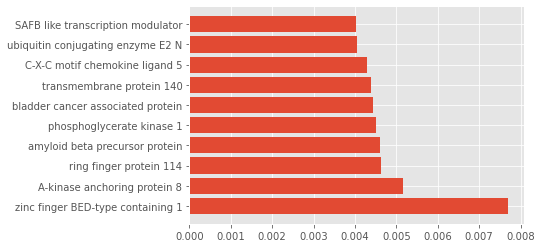

In [708]:
imps_to_plot = imp_rf.sort_values(by='imps', ascending=False).head(10)
plt.barh(imps_to_plot['Gene name'], imps_to_plot['imps'])

In [713]:
compare_all = imp_rf.set_index('Gene name').sort_values(by='imps', ascending=False).head(10)['imps']
compare_all.index

Index(['zinc finger BED-type containing 1', 'A-kinase anchoring protein 8',
       'ring finger protein 114', 'amyloid beta precursor protein',
       'phosphoglycerate kinase 1', 'bladder cancer associated protein',
       'transmembrane protein 140', 'C-X-C motif chemokine ligand 5',
       'ubiquitin conjugating enzyme E2 N',
       'SAFB like transcription modulator'],
      dtype='object', name='Gene name')

In [714]:
compare_all = pd.DataFrame(list(zip(compare_all.index, geo_all)), columns=['RF Differential/UC,CD,NM', 'Bioconductor Differential/UC,CD,NM'])
compare_all.head(10)

,"RF Differential/UC,CD,NM","Bioconductor Differential/UC,CD,NM"
0,zinc finger BED-type containing 1,"histone cluster 1, H2ac"
1,A-kinase anchoring protein 8,"histone cluster 1, H2bk"
2,ring finger protein 114,brain abundant membrane attached signal protein 1
3,amyloid beta precursor protein,progesterone receptor membrane component 1
4,phosphoglycerate kinase 1,"histone cluster 2, H2be"
5,bladder cancer associated protein,folate receptor 1
6,transmembrane protein 140,serpin family B member 2
7,C-X-C motif chemokine ligand 5,monocyte to macrophage differentiation associated
8,ubiquitin conjugating enzyme E2 N,amyloid beta precursor protein
9,SAFB like transcription modulator,transmembrane protein 158 (gene/pseudogene)


### Summary of kNN and Random Forests

|          Model          	| Train 	| Test 	|          Best Parameters          	|
|:-----------------------:	|:-----:	|:----:	|:---------------------------------:	|
| kNN with PCA            	| 1.0   	| 0.72 	| Metric:Euclidean n-neighbors: 1   	|
| kNN all genes           	| 0.75  	| 0.59 	| Metric: Manhattan n-neighbors: 21 	|
| Random Forest with PCA  	| 1.0   	| 0.65 	| Max-Depth: None n-estimators: 150 	|
| Random Forest All genes 	| 1.0   	| 0.70 	| Max-Depth: None n-estimators: 150 	|

### Use logistic regression model to predict UC against normal and CD against normal

In [584]:
# Create a dataframe with only UC and Normal samples

df.head()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.382661,6.589557,6.608669,6.397301,6.231299,5.929730,6.074643,6.526892,6.729527,6.045421,6.331441,6.274374,6.496154,6.358507,6.158130,6.496644,6.185766,6.169309,6.598857,6.261507,6.359359,6.331351,6.285030,6.501876,5.735505,6.319850,6.073757,6.479443,6.193996,6.523940,6.071335,5.913494,6.774238,6.310667,6.040967,6.018622,6.078189,6.115689,5.697258,6.357936,6.110460,6.437110,6.412185,6.064644,6.470831,6.857042,5.769459,6.412313,6.249727,6.720460,...,6.858734,5.962292,6.253489,6.238440,6.537258,6.285958,6.027515,6.298321,6.335009,5.976928,5.946522,6.297048,6.756208,6.661990,6.524403,6.522643,6.119776,6.725851,5.904653,6.303294,6.634581,6.729989,5.935937,6.310515,6.129484,6.377719,5.941845,6.149118,6.095989,6.186103,6.123071,5.856623,6.015983,6.414365,5.842242,5.961018,5.633461,6.408309,6.173188,6.348845,6.202164,6.425718,6.323964,6.301666,6.402520,6.561243,5.743080,6.459312,6.385285,6.145335
1053_at,5.871326,4.878061,5.449387,4.899039,4.584867,5.209132,4.693102,3.977666,4.566600,5.102809,4.959941,5.079732,4.591336,4.912968,4.396805,4.477802,4.526972,5.213776,5.215913,4.785458,5.276424,5.229924,4.878334,4.641271,5.129132,4.751195,4.821506,4.894714,5.312187,4.831496,4.361319,4.254259,5.485159,4.607696,4.972134,5.006505,4.874971,5.293084,5.389189,5.310517,3.878980,5.001949,4.990839,4.689582,5.066674,4.953094,5.113617,5.435301,5.173542,4.788608,...,4.496257,4.802902,4.659385,5.136380,4.742369,4.846875,5.174210,5.244204,4.700032,4.502854,4.613833,4.410685,4.834576,4.861338,4.492312,4.561338,5.161655,4.407452,5.492558,4.627019,5.270660,4.250016,4.837356,5.021156,4.918464,4.475635,3.809461,4.415784,5.198838,4.745639,5.067949,4.559183,4.888661,5.824860,4.639751,4.328384,4.652291,4.525446,4.742527,4.542567,4.018870,4.869823,4.594830,4.692336,5.042849,4.782566,4.753444,5.138295,4.618365,4.353786
117_at,5.835663,5.921491,6.736059,6.043868,5.958280,5.852238,6.581454,5.679843,6.073959,5.858080,5.883117,5.993516,6.186025,5.996046,5.851926,6.456817,6.425097,5.869971,6.628892,5.933291,5.419400,6.160361,5.619221,5.778860,6.330025,5.574331,4.630328,5.605788,5.257950,4.449917,5.034140,5.400625,5.441565,5.668221,5.219335,5.599813,6.539672,7.018696,6.411289,5.802769,5.120004,5.266599,4.974462,4.852375,5.417188,8.170643,6.989161,5.623533,5.751630,4.680720,...,6.248449,5.370894,6.230972,5.870897,5.671046,6.377512,5.544193,6.102169,5.630438,6.135886,6.011312,5.361476,6.324106,6.443518,6.117733,5.428021,5.566092,6.977216,5.833707,6.524963,6.814857,6.619354,5.297264,6.242569,5.942064,5.977965,5.202133,5.999923,5.494490,5.771217,5.683317,5.791413,5.327446,5.746793,5.558513,6.360571,5.869865,5.677152,5.609986,6.125023,5.425782,5.182849,5.534319,5.654300,5.712656,6.079347,5.873668,5.945533,5.981726,5.419848
121_at,8.103100,8.443505,8.494700,7.895723,7.946928,8.134139,8.011350,8.199173,8.511109,8.347532,8.157562,8.136901,8.345359,8.184977,8.033005,8.035576,7.738157,8.068512,8.053709,8.067641,8.114891,8.031708,8.101416,8.153414,7.781820,7.955671,8.326602,

In [585]:
uc = df.drop(columns=CD)

In [586]:
# Transpose dataframe
uc_t = uc.T

In [587]:
uc_t.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,200020_at,200021_at,200022_at,200023_s_at,200024_at,200025_s_at,200026_at,200027_at,200028_s_at,200029_at,...,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,!series_matrix_table_end
GSM76030,6.382661,5.871326,5.835663,8.103100,3.529799,7.492383,4.791131,1.961087,9.284626,1.925061,3.581839,6.214622,5.859110,6.852490,6.765528,6.087171,4.298811,4.256098,7.536217,5.798628,8.620822,9.791745,11.834602,12.669051,10.872948,10.292415,10.345631,10.645182,9.005625,9.942618,12.217074,7.520121,12.144758,12.108471,9.180424,8.333575,11.829161,12.233899,12.252235,12.430847,8.886568,10.803180,12.393032,11.346954,11.915456,12.172578,12.446742,8.837930,8.086018,12.101253,...,7.137950,4.116503,5.565544,5.582836,7.967987,7.417954,6.352502,2.644662,1.155077,1.394372,4.920347,9.503307,10.606108,1.678498,0.161588,-0.541828,5.718410,6.977716,7.829251,2.367110,2.457372,1.861291,3.423217,2.523174,1.610606,2.181349,4.058743,3.556321,12.002831,9.996016,11.806078,9.536606,7.808093,12.255440,-0.149810,7.691930,7.523365,6.759961,8.867854,6.618826,6.772599,9.139745,11.263042,1.599166,2.992996,0.842147,-0.593707,1.419971,-0.406466,0.0
GSM76031,6.589557,4.878061,5.921491,8.443505,3.434311,7.523480,5.691385,2.017142,10.521182,4.738377,5.031096,6.773676,7.105315,7.477063,7.519966,5.978473,4.072635,4.799804,7.675697,6.206278,8.000494,10.119121,11.000942,12.402118,10.757379,9.268689,10.268498,10.218191,8.278435,9.973495,12.069405,8.331984,11.880424,11.626703,8.973577,8.864366,11.630817,11.709738,12.103581,12.286003,7.268632,11.801158,11.824912,11.187173,11.284662,12.091435,11.983613,8.892188,9.016253,12.024419,...,6.907922,0.976077,4.072253,5.659583,6.717703,6.491562,6.098502,2.635418,1.096499,1.892544,4.344220,8.288436,8.513251,5.123195,1.195234,0.465478,5.552748,6.769131,7.302340,3.933223,3.015676,3.798275,2.642175,2.847760,0.771246,2.003625,5.397119,4.966129,11.779622,9.730404,12.011141,9.486894,7.624385,12.246286,1.146636,6.840819,6.386817,6.218056,7.382698,5.793376,6.529938,9.079049,11.074144,2.391370,1.870512,1.141420,0.159884,3.444175,1.197514,0.0
GSM76032,6.608669,5.449387,6.736059,8.494700,4.393491,7.974638,5.093344,3.429126,9.450795,3.994468,3.170683,7.018459,6.535379,7.389972,7.292100,7.037641,4.384642,5.282313,7.882565,5.728317,8.120956,10.375070,11.147276,12.661328,10.611468,9.633794,10.321648,10.064613,8.419144,10.153697,11.889602,8.331853,12.084040,11.423140,8.794230,8.752605,11.412683,11.189656,12.358859,12.297796,8.043408,12.316081,12.254213,11.227224,11.093967,12.012300,12.099628,9.052299,8.007048,12.081218,...,8.077159,3.686105,6.597276,6.942833,6.998143,6.277936,5.850655,3.601851,3.729112,1.445706,4.471469,9.878337,9.434238,3.574596,0

In [588]:
# label disease type and assign UC=0, NM=1
disease_type_uc = []
for items in UC:
    disease_type_uc.append(0)

In [589]:
for items in NM:
    disease_type_uc.append(1)

In [590]:
uc_t['disease_type'] = disease_type_uc

In [591]:
uc_t.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,200020_at,200021_at,200022_at,200023_s_at,200024_at,200025_s_at,200026_at,200027_at,200028_s_at,200029_at,...,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,!series_matrix_table_end,disease_type
GSM76030,6.382661,5.871326,5.835663,8.103100,3.529799,7.492383,4.791131,1.961087,9.284626,1.925061,3.581839,6.214622,5.859110,6.852490,6.765528,6.087171,4.298811,4.256098,7.536217,5.798628,8.620822,9.791745,11.834602,12.669051,10.872948,10.292415,10.345631,10.645182,9.005625,9.942618,12.217074,7.520121,12.144758,12.108471,9.180424,8.333575,11.829161,12.233899,12.252235,12.430847,8.886568,10.803180,12.393032,11.346954,11.915456,12.172578,12.446742,8.837930,8.086018,12.101253,...,4.116503,5.565544,5.582836,7.967987,7.417954,6.352502,2.644662,1.155077,1.394372,4.920347,9.503307,10.606108,1.678498,0.161588,-0.541828,5.718410,6.977716,7.829251,2.367110,2.457372,1.861291,3.423217,2.523174,1.610606,2.181349,4.058743,3.556321,12.002831,9.996016,11.806078,9.536606,7.808093,12.255440,-0.149810,7.691930,7.523365,6.759961,8.867854,6.618826,6.772599,9.139745,11.263042,1.599166,2.992996,0.842147,-0.593707,1.419971,-0.406466,0.0,0
GSM76031,6.589557,4.878061,5.921491,8.443505,3.434311,7.523480,5.691385,2.017142,10.521182,4.738377,5.031096,6.773676,7.105315,7.477063,7.519966,5.978473,4.072635,4.799804,7.675697,6.206278,8.000494,10.119121,11.000942,12.402118,10.757379,9.268689,10.268498,10.218191,8.278435,9.973495,12.069405,8.331984,11.880424,11.626703,8.973577,8.864366,11.630817,11.709738,12.103581,12.286003,7.268632,11.801158,11.824912,11.187173,11.284662,12.091435,11.983613,8.892188,9.016253,12.024419,...,0.976077,4.072253,5.659583,6.717703,6.491562,6.098502,2.635418,1.096499,1.892544,4.344220,8.288436,8.513251,5.123195,1.195234,0.465478,5.552748,6.769131,7.302340,3.933223,3.015676,3.798275,2.642175,2.847760,0.771246,2.003625,5.397119,4.966129,11.779622,9.730404,12.011141,9.486894,7.624385,12.246286,1.146636,6.840819,6.386817,6.218056,7.382698,5.793376,6.529938,9.079049,11.074144,2.391370,1.870512,1.141420,0.159884,3.444175,1.197514,0.0,0
GSM76032,6.608669,5.449387,6.736059,8.494700,4.393491,7.974638,5.093344,3.429126,9.450795,3.994468,3.170683,7.018459,6.535379,7.389972,7.292100,7.037641,4.384642,5.282313,7.882565,5.728317,8.120956,10.375070,11.147276,12.661328,10.611468,9.633794,10.321648,10.064613,8.419144,10.153697,11.889602,8.331853,12.084040,11.423140,8.794230,8.752605,11.412683,11.189656,12.358859,12.297796,8.043408,12.316081,12.254213,11.227224,11.093967,12.012300,12.099628,9.052299,8.007048,12.081218,...,3.686105,6.597276,6.942833,6.998143,6.277936,5.850655,3.601851,3.729112,1.445706,4.471469,9.878337,9.434238,3.574596,0.783106,0.592948,5.041390,5.805748,7.

In [592]:
uc_t['disease_type'].value_counts(normalize=True) #Baseline accuracy

1    0.617647
0    0.382353
Name: disease_type, dtype: float64

In [593]:
# Set up X and y.
X_uc = uc_t.drop(columns = ['!series_matrix_table_end', 'disease_type'])
y_uc = uc_t['disease_type']

In [594]:
X_uc.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,200020_at,200021_at,200022_at,200023_s_at,200024_at,200025_s_at,200026_at,200027_at,200028_s_at,200029_at,...,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM76030,6.382661,5.871326,5.835663,8.103100,3.529799,7.492383,4.791131,1.961087,9.284626,1.925061,3.581839,6.214622,5.859110,6.852490,6.765528,6.087171,4.298811,4.256098,7.536217,5.798628,8.620822,9.791745,11.834602,12.669051,10.872948,10.292415,10.345631,10.645182,9.005625,9.942618,12.217074,7.520121,12.144758,12.108471,9.180424,8.333575,11.829161,12.233899,12.252235,12.430847,8.886568,10.803180,12.393032,11.346954,11.915456,12.172578,12.446742,8.837930,8.086018,12.101253,...,11.324713,7.137950,4.116503,5.565544,5.582836,7.967987,7.417954,6.352502,2.644662,1.155077,1.394372,4.920347,9.503307,10.606108,1.678498,0.161588,-0.541828,5.718410,6.977716,7.829251,2.367110,2.457372,1.861291,3.423217,2.523174,1.610606,2.181349,4.058743,3.556321,12.002831,9.996016,11.806078,9.536606,7.808093,12.255440,-0.149810,7.691930,7.523365,6.759961,8.867854,6.618826,6.772599,9.139745,11.263042,1.599166,2.992996,0.842147,-0.593707,1.419971,-0.406466
GSM76031,6.589557,4.878061,5.921491,8.443505,3.434311,7.523480,5.691385,2.017142,10.521182,4.738377,5.031096,6.773676,7.105315,7.477063,7.519966,5.978473,4.072635,4.799804,7.675697,6.206278,8.000494,10.119121,11.000942,12.402118,10.757379,9.268689,10.268498,10.218191,8.278435,9.973495,12.069405,8.331984,11.880424,11.626703,8.973577,8.864366,11.630817,11.709738,12.103581,12.286003,7.268632,11.801158,11.824912,11.187173,11.284662,12.091435,11.983613,8.892188,9.016253,12.024419,...,11.133249,6.907922,0.976077,4.072253,5.659583,6.717703,6.491562,6.098502,2.635418,1.096499,1.892544,4.344220,8.288436,8.513251,5.123195,1.195234,0.465478,5.552748,6.769131,7.302340,3.933223,3.015676,3.798275,2.642175,2.847760,0.771246,2.003625,5.397119,4.966129,11.779622,9.730404,12.011141,9.486894,7.624385,12.246286,1.146636,6.840819,6.386817,6.218056,7.382698,5.793376,6.529938,9.079049,11.074144,2.391370,1.870512,1.141420,0.159884,3.444175,1.197514
GSM76032,6.608669,5.449387,6.736059,8.494700,4.393491,7.974638,5.093344,3.429126,9.450795,3.994468,3.170683,7.018459,6.535379,7.389972,7.292100,7.037641,4.384642,5.282313,7.882565,5.728317,8.120956,10.375070,11.147276,12.661328,10.611468,9.633794,10.321648,10.064613,8.419144,10.153697,11.889602,8.331853,12.084040,11.423140,8.794230,8.752605,11.412683,11.189656,12.358859,12.297796,8.043408,12.316081,12.254213,11.227224,11.093967,12.012300,12.099628,9.052299,8.007048,12.081218,...,11.615714,8.077159,3.686105,6.597276,6.942833,6.998143,6.277936,5.850655,3.601851,3.729112,1.445706,4.471469,9.878

In [595]:
# Train/test/split on data

X_train_uc, X_test_uc, y_train_uc, y_test_uc = train_test_split(X_uc,
                                                    y_uc,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [596]:
# Instantiate StandardScaler.
ss = StandardScaler()

# Standardize X_train.
X_train_uc = ss.fit_transform(X_train_uc)

# Standardize X_test.
X_test_uc = ss.transform(X_test_uc)

In [597]:
# Instantiate PCA with 50 components for cumuluative explained variance in EDA, limit is 51
pca_uc = PCA(n_components = 50, random_state = 42)

# Fit PCA to training data.
pca_uc.fit(X_train_uc)

PCA(n_components=50, random_state=42)

In [598]:
# Transform PCA on the training data.
Z_train_uc = pca_uc.transform(X_train_uc)

In [599]:
Z_test_uc = pca_uc.transform(X_test_uc)

In [600]:
lr_pca_uc = LogisticRegression()

In [601]:
lr_pca_uc.fit(Z_train_uc, y_train_uc)

LogisticRegression()

In [602]:
lr_pca_uc.score(Z_train_uc, y_train_uc), lr_pca_uc.score(Z_test_uc, y_test_uc)

(1.0, 1.0)

In [603]:
cross_val_score(lr_pca_uc, Z_train_uc, y_train_uc).mean()

0.9436363636363637

In [604]:
preds_pca_uc = lr_pca_uc.predict(Z_test_uc)

In [605]:
confusion_matrix(y_test_uc, preds_pca_uc)  

array([[ 7,  0],
       [ 0, 10]], dtype=int64)

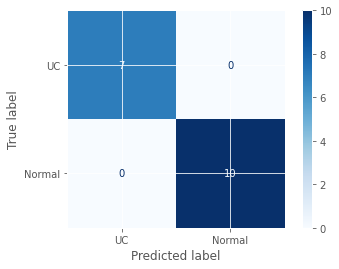

In [606]:
plot_confusion_matrix(lr_pca_uc, Z_test_uc, y_test_uc, cmap='Blues', 
                      values_format='d', display_labels=['UC', 'Normal']);

In [607]:
y_train_uc

GSM76037    0
GSM76131    1
GSM76120    1
GSM76125    1
GSM76049    0
GSM76134    1
GSM76122    1
GSM76137    1
GSM76119    1
GSM76043    0
GSM76152    1
GSM76129    1
GSM76033    0
GSM76047    0
GSM76123    1
GSM76038    0
GSM76133    1
GSM76036    0
GSM76145    1
GSM76155    1
GSM76045    0
GSM76116    1
GSM76115    1
GSM76054    0
GSM76156    1
GSM76041    0
GSM76121    1
GSM76153    1
GSM76139    1
GSM76126    1
GSM76118    1
GSM76132    1
GSM76142    1
GSM76031    0
GSM76051    0
GSM76032    0
GSM76151    1
GSM76128    1
GSM76124    1
GSM76141    1
GSM76053    0
GSM76148    1
GSM76040    0
GSM76052    0
GSM76048    0
GSM76146    1
GSM76127    1
GSM76050    0
GSM76149    1
GSM76044    0
GSM76140    1
Name: disease_type, dtype: int64

In [608]:
#Stats models logistic regression

#https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logistic-regression-and-what-are-some-strategies-to-deal-with-the-issue/

#In rare occasions, it might happen simply because the data set is rather small and the distribution is somewhat extreme. 
#For example, it could be the case that if we were to collect more data, we would have observations with Y = 1 and X1 <=3, 
#hence Y would not separate X1 completely.   

log_reg_uc = sm.Logit(y_train_uc, Z_train_uc).fit() 

PerfectSeparationError: Perfect separation detected, results not available

In [609]:
# CD against NM samples

In [610]:
cd = df.drop(columns=UC)

In [611]:
# Transpose dataframe
cd_t = cd.T

In [612]:
cd_t.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,200020_at,200021_at,200022_at,200023_s_at,200024_at,200025_s_at,200026_at,200027_at,200028_s_at,200029_at,...,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,!series_matrix_table_end
GSM76056,6.073757,4.821506,4.630328,8.326602,4.170451,6.516545,4.872119,2.662530,10.327351,4.283327,2.797863,6.703017,6.007876,7.095810,6.798080,5.587145,3.191492,3.609822,7.555849,4.876764,8.288012,9.826168,11.978352,12.831008,11.079161,10.399888,10.361399,10.866421,8.809686,10.000470,12.278200,7.923542,12.379669,12.240310,9.541179,8.912600,12.078616,11.998270,12.416836,12.484635,6.745784,11.400227,12.506806,11.166890,11.940043,12.227355,12.658884,8.956374,8.810126,12.254412,...,7.789631,5.233474,6.750619,6.638027,6.701692,6.319595,6.410882,1.367030,2.211418,3.818502,4.932975,7.934563,8.447027,4.937425,0.652648,0.569206,6.036941,6.983855,7.654617,1.218127,4.027427,2.330158,4.119968,3.246027,3.651206,2.223319,4.114658,3.316330,12.162222,9.942116,12.049328,9.411617,7.874314,12.419690,0.419615,6.681050,6.076092,6.399821,7.442889,5.622066,6.543006,8.994598,11.089954,1.703392,1.405834,3.452610,1.103737,1.997790,0.887735,0.0
GSM76057,6.479443,4.894714,5.605788,8.238403,4.238062,7.082603,5.269624,2.586690,10.223279,4.246327,3.058471,6.922614,5.961891,7.289807,7.275117,6.769145,4.890518,4.961539,7.681298,5.406574,8.256645,10.079094,11.762974,12.689521,11.049388,10.146816,10.799407,10.601551,9.614242,10.471564,12.323255,8.018407,12.116263,12.026284,9.379028,8.915075,11.822318,11.749007,12.180638,12.513193,6.700359,11.690945,12.396226,11.029120,11.834102,12.094149,12.435087,8.930334,8.792111,11.870022,...,7.296524,4.410012,6.508988,5.819400,7.168197,6.145058,6.385766,3.153779,2.903283,2.585179,4.487684,8.394224,8.837627,2.658692,1.033145,0.888147,5.916124,6.917767,7.554176,3.068419,4.015030,4.081273,4.472079,3.891811,4.262100,0.698436,4.444422,4.528733,12.065376,10.160601,11.996034,9.360693,7.844659,12.427851,1.377779,7.034427,4.269713,6.487757,8.180788,5.919433,6.469476,8.862901,11.272852,2.049518,2.024213,1.389593,2.465541,1.885734,1.470090,0.0
GSM76058,6.193996,5.312187,5.257950,8.147193,4.287560,7.032695,5.144086,3.885158,9.855957,3.217138,2.658622,6.306933,6.227327,7.014948,6.204732,6.864679,4.968264,4.122414,7.502786,5.765877,7.982468,10.823045,11.751959,12.671949,10.852494,9.957305,10.679165,10.606165,9.387252,10.823455,12.004639,8.904009,12.421373,12.020224,9.190802,8.892455,11.707770,11.872758,12.412782,12.398501,6.766516,11.852991,12.242944,11.292513,11.908601,12.337371,12.620133,8.785783,9.022399,12.351946,...,7.560822,4.068511,5.826235,5.719855,5.877173,5.032934,4.679833,1.507080,2.295355,2.643988,4.338160,5.683183,7.200470,3.143231,0

In [613]:
# label disease type and assign UC=0, NM=1
disease_type_cd = []
for items in CD:
    disease_type_cd.append(0)

In [614]:
for items in NM:
    disease_type_cd.append(1)

In [615]:
cd_t['disease_type'] = disease_type_cd

In [616]:
cd_t['disease_type'].value_counts(normalize=True) #Baseline accuracy

0    0.584158
1    0.415842
Name: disease_type, dtype: float64

In [326]:
# Set up X and y.
X_cd = cd_t.drop(columns = ['!series_matrix_table_end', 'disease_type'])
y_cd = cd_t['disease_type']

In [327]:
# Train/test/split on data

X_train_cd, X_test_cd, y_train_cd, y_test_cd = train_test_split(X_cd,
                                                    y_cd,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [328]:
# Instantiate StandardScaler.
ss = StandardScaler()

# Standardize X_train.
X_train_cd = ss.fit_transform(X_train_cd)

# Standardize X_test.
X_test_cd = ss.transform(X_test_cd)

In [329]:
# Instantiate PCA with 50 components for cumuluative explained variance in EDA, limit is 51
pca_cd = PCA(n_components = 50, random_state = 42)

# Fit PCA to training data.
pca_cd.fit(X_train_cd)

PCA(n_components=50, random_state=42)

In [330]:
# Transform PCA on the training data.
Z_train_cd = pca_uc.transform(X_train_cd)

In [331]:
Z_test_cd = pca_uc.transform(X_test_cd)

In [332]:
lr_pca_cd = LogisticRegression()

In [333]:
lr_pca_cd.fit(Z_train_cd, y_train_cd)

C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [334]:
lr_pca_cd.score(Z_train_cd, y_train_cd), lr_pca_cd.score(Z_test_cd, y_test_cd)

(1.0, 0.8846153846153846)

In [335]:
cross_val_score(lr_pca_cd, Z_train_cd, y_train_cd).mean()

C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8800000000000001

In [336]:
preds_pca_cd = lr_pca_cd.predict(Z_test_cd)

In [338]:
confusion_matrix(y_test_cd, preds_pca_cd)  

array([[15,  1],
       [ 2,  8]], dtype=int64)

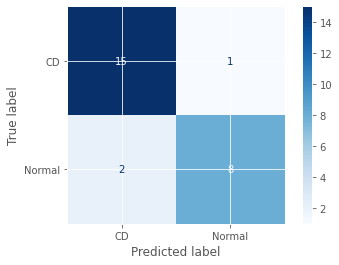

In [339]:
plot_confusion_matrix(lr_pca_cd, Z_test_cd, y_test_cd, cmap='Blues', 
                      values_format='d', display_labels=['CD', 'Normal']);

In [633]:
log_reg_cd = sm.Logit(y_train_cd, X_train_cd).fit() 

KeyboardInterrupt: 

In [561]:
# Try logistic regression with full set of 22K genes for UC vs NM samples

In [341]:
lr_uc.fit(X_train_uc, y_train_uc)

LogisticRegression()

In [342]:
lr_uc.score(X_train_uc, y_train_uc), lr_uc.score(X_test_uc, y_test_uc)

(1.0, 1.0)

In [506]:
lr_uc.coef_

array([[-0.00093293,  0.0001258 , -0.00094929, ...,  0.00089127,
        -0.00038481, -0.0025815 ]])

In [507]:
coefs_uc = pd.DataFrame({
    'coefs': lr_uc.coef_[0],
    'vars': X_uc.columns
})
coefs_uc

,coefs,vars
0,-0.000933,1007_s_at
1,0.000126,1053_at
2,-0.000949,117_at
3,-0.000420,121_at
4,0.001204,1255_g_at
...,...,...
22278,-0.002219,AFFX-ThrX-5_at
22279,-0.000614,AFFX-ThrX-M_at
22280,0.000891,AFFX-TrpnX-3_at
22281,-0.000385,AFFX-TrpnX-5_at


In [508]:
coefs_uc['ABS'] = coefs_uc['coefs'].abs()

In [540]:
geo_uc = pd.read_csv('uc_vs_n.top.table.csv', index_col='ID')
geo_uc_10 = geo_uc['Gene.title'][:10]
geo_uc.head()

,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
ID,,,,,,,
211074_at,4.360000e-13,1.960000e-17,-11.351049,28.85830,-1.458102,FOLR1,folate receptor 1
202391_at,1.410000e-12,1.260000e-16,10.885770,27.10076,1.468229,BASP1,brain abundant membrane attached signal protein 1
208540_x_at,7.490000e-11,1.010000e-14,9.814733,22.96001,1.046120,NaN,NaN
200680_x_at,1.150000e-10,2.070000e-14,-9.641379,22.27890,-0.534554,HMGB1,high mobility group box 1
200660_at,4.750000e-10,1.070000e-13,9.247111,20.72048,1.281783,S100A11,S100 calcium binding protein A11


In [535]:
top_genes_uc = coefs_uc['vars']
genes_uc = []
for id in top_genes_uc:
    result = geo_uc.loc[id]
    genes_uc.append(result[-1])
genes_uc

top50_uc = list(zip(top_genes_uc, genes_uc))
uc_top50 = pd.DataFrame(top50_uc, columns = ['ID', 'LR Differential'])
uc_top50.head()

,ID,LR Differential
0,1007_s_at,microRNA 4640///discoidin domain receptor tyro...
1,1053_at,replication factor C subunit 2
2,117_at,heat shock protein family A (Hsp70) member 6
3,121_at,paired box 8
4,1255_g_at,guanylate cyclase activator 1A


In [536]:
conversion_uc = uc_top50.set_index('ID')['LR Differential'].to_dict()

In [537]:
coefs_uc['Gene name'] = coefs_uc['vars'].replace(conversion)
coefs_uc.head()

,coefs,vars,ABS,Gene name
0,-0.000933,1007_s_at,0.000933,microRNA 4640///discoidin domain receptor tyro...
1,0.000126,1053_at,0.000126,replication factor C subunit 2
2,-0.000949,117_at,0.000949,heat shock protein family A (Hsp70) member 6
3,-0.000420,121_at,0.000420,paired box 8
4,0.001204,1255_g_at,0.001204,guanylate cyclase activator 1A


In [538]:
coefs_uc.sort_values(by='ABS', ascending=False).head(10)

,coefs,vars,ABS,Gene name
1918,-0.006969,202391_at,0.006969,brain abundant membrane attached signal protein 1
10517,0.006811,211074_at,0.006811,folate receptor 1
9495,0.006604,210011_s_at,0.006604,EWS RNA binding protein 1
10922,0.006565,211517_s_at,0.006565,interleukin 5 receptor subunit alpha
12681,-0.006560,213301_x_at,0.006560,tripartite motif containing 24
16523,-0.006438,217157_x_at,0.006438,immunoglobulin kappa locus///immunoglobulin ka...
207,0.006408,200680_x_at,0.006408,high mobility group box 1
11353,-0.006359,211967_at,0.006359,transmembrane protein 123
8013,-0.006210,208516_at,0.006210,melatonin receptor 1B
17522,-0.006209,218158_s_at,0.006209,"adaptor protein, phosphotyrosine interacting w..."


In [554]:
compare_uc = coefs_uc.set_index('Gene name').sort_values(by='ABS', ascending=False).head(10)['coefs']
compare_uc

Gene name
brain abundant membrane attached signal protein 1                                  -0.006969
folate receptor 1                                                                   0.006811
EWS RNA binding protein 1                                                           0.006604
interleukin 5 receptor subunit alpha                                                0.006565
tripartite motif containing 24                                                     -0.006560
immunoglobulin kappa locus///immunoglobulin kappa constant                         -0.006438
high mobility group box 1                                                           0.006408
transmembrane protein 123                                                          -0.006359
melatonin receptor 1B                                                              -0.006210
adaptor protein, phosphotyrosine interacting with PH domain and leucine zipper 1   -0.006209
Name: coefs, dtype: float64

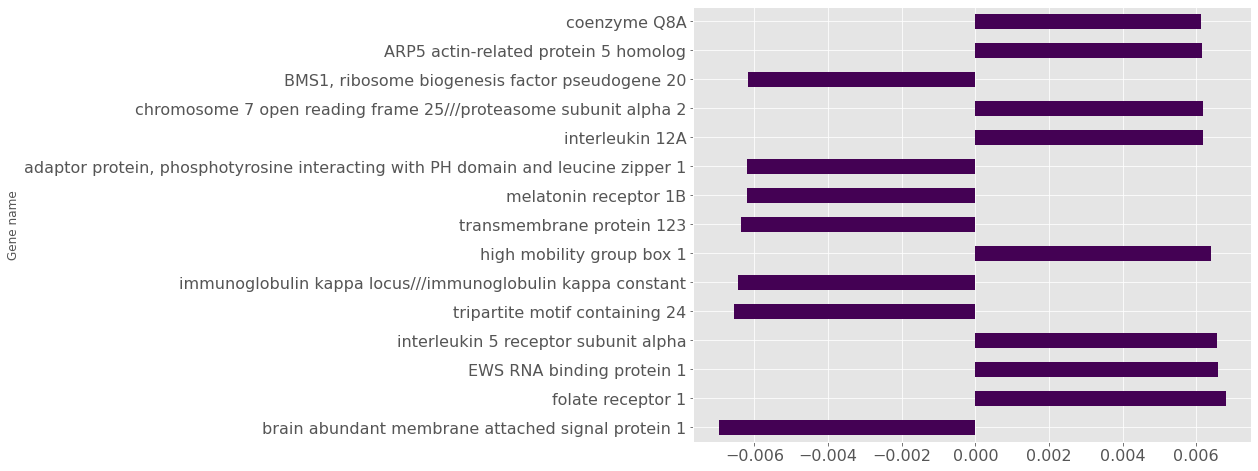

In [555]:
coefs_uc.set_index('Gene name').sort_values(by='ABS', ascending=False).head(15)['coefs'].plot(kind='barh', fontsize = 16, figsize = (10, 8), cmap='viridis');

In [557]:
compare_uc = pd.DataFrame(list(zip(compare_uc.index, geo_uc_10)), columns=['LR Differential/UC vs NM', 'Bioconductor Differential/UC vs NM'])
compare_uc.head(10)

,LR Differential/UC vs NM,Bioconductor Differential/UC vs NM
0,brain abundant membrane attached signal protein 1,folate receptor 1
1,folate receptor 1,brain abundant membrane attached signal protein 1
2,EWS RNA binding protein 1,NaN
3,interleukin 5 receptor subunit alpha,high mobility group box 1
4,tripartite motif containing 24,S100 calcium binding protein A11
5,immunoglobulin kappa locus///immunoglobulin ka...,microRNA 8071-2///microRNA 8071-1///immunoglob...
6,high mobility group box 1,ARP5 actin-related protein 5 homolog
7,transmembrane protein 123,lysine demethylase 2A
8,melatonin receptor 1B,solute carrier family 22 member 4
9,"adaptor protein, phosphotyrosine interacting w...",immunoglobulin kappa locus///immunoglobulin ka...


In [559]:
compare_uc = compare_uc.fillna('Affy Gene')
compare_uc.head(10)

,LR Differential/UC vs NM,Bioconductor Differential/UC vs NM
0,brain abundant membrane attached signal protein 1,folate receptor 1
1,folate receptor 1,brain abundant membrane attached signal protein 1
2,EWS RNA binding protein 1,Affy Gene
3,interleukin 5 receptor subunit alpha,high mobility group box 1
4,tripartite motif containing 24,S100 calcium binding protein A11
5,immunoglobulin kappa locus///immunoglobulin ka...,microRNA 8071-2///microRNA 8071-1///immunoglob...
6,high mobility group box 1,ARP5 actin-related protein 5 homolog
7,transmembrane protein 123,lysine demethylase 2A
8,melatonin receptor 1B,solute carrier family 22 member 4
9,"adaptor protein, phosphotyrosine interacting w...",immunoglobulin kappa locus///immunoglobulin ka...


In [562]:
# Try logisitic regression on full set of 22K genes on CD vs NM samples

In [400]:
lr_cd.fit(X_train_cd, y_train_cd)

LogisticRegression()

In [401]:
lr_cd.score(X_train_cd, y_train_cd), lr_cd.score(X_test_cd, y_test_cd)

(1.0, 0.9230769230769231)

In [402]:
preds_cd = lr_cd.predict(X_test_cd)

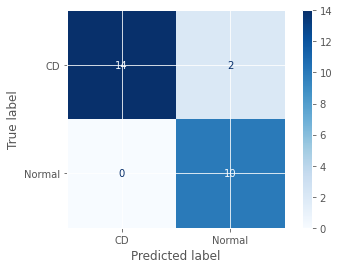

In [403]:
plot_confusion_matrix(lr_cd, X_test_cd, y_test_cd, cmap='Blues', 
                      values_format='d', display_labels=['CD', 'Normal']);

In [491]:
lr_cd.coef_

array([[ 5.75998224e-05, -2.00433362e-03,  2.07115485e-03, ...,
         2.46935675e-03,  3.17398776e-03, -2.08652038e-03]])

In [492]:
coefs_cd = pd.DataFrame({
    'coefs': lr_cd.coef_[0],
    'vars': X_cd.columns
})
coefs_cd

,coefs,vars
0,0.000058,1007_s_at
1,-0.002004,1053_at
2,0.002071,117_at
3,-0.000758,121_at
4,0.001094,1255_g_at
...,...,...
22278,-0.001026,AFFX-ThrX-5_at
22279,0.004936,AFFX-ThrX-M_at
22280,0.002469,AFFX-TrpnX-3_at
22281,0.003174,AFFX-TrpnX-5_at


In [514]:
coefs['ABS'] = coefs['coefs'].abs()

In [571]:
geo_cd = pd.read_csv('cd_vs_nm.top.table.csv', index_col='ID')
geo_cd_10 = geo_cd['Gene.title'][:10]
geo_cd.head()

,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
ID,,,,,,,
215071_s_at,5.050000e-18,2.270000e-22,-12.524095,40.052030,-1.270200,HIST1H2AC,"histone cluster 1, H2ac"
209806_at,9.480000e-17,8.510000e-21,-11.799651,36.561661,-1.135881,HIST1H2BK,"histone cluster 1, H2bk"
201121_s_at,3.150000e-16,4.240000e-20,-11.481251,35.013519,-0.931494,PGRMC1,progesterone receptor membrane component 1
204614_at,4.220000e-16,7.730000e-20,-11.362442,34.433926,-3.500477,SERPINB2,serpin family B member 2
202708_s_at,4.220000e-16,9.480000e-20,-11.322131,34.237054,-1.292234,HIST2H2BE,"histone cluster 2, H2be"


In [572]:
top_genes = coefs_cd['vars']
genes = []
for id in top_genes:
    result = geo_cd.loc[id]
    genes.append(result[-1])
genes

top50 = list(zip(top_genes, genes))
cd_top50 = pd.DataFrame(top50, columns = ['ID', 'LR Differential'])
cd_top50.head()

,ID,LR Differential
0,1007_s_at,microRNA 4640///discoidin domain receptor tyro...
1,1053_at,replication factor C subunit 2
2,117_at,heat shock protein family A (Hsp70) member 6
3,121_at,paired box 8
4,1255_g_at,guanylate cyclase activator 1A


In [573]:
conversion = cd_top50.set_index('ID')['LR Differential'].to_dict()
conversion

{'1007_s_at': 'microRNA 4640///discoidin domain receptor tyrosine kinase 1',
 '1053_at': 'replication factor C subunit 2',
 '117_at': 'heat shock protein family A (Hsp70) member 6',
 '121_at': 'paired box 8',
 '1255_g_at': 'guanylate cyclase activator 1A',
 '1294_at': 'microRNA 5193///ubiquitin like modifier activating enzyme 7',
 '1316_at': 'thyroid hormone receptor, alpha',
 '1320_at': 'protein tyrosine phosphatase, non-receptor type 21',
 '1405_i_at': 'C-C motif chemokine ligand 5',
 '1431_at': 'cytochrome P450 family 2 subfamily E member 1',
 '1438_at': 'EPH receptor B3',
 '1487_at': 'estrogen related receptor alpha',
 '1494_f_at': 'cytochrome P450 family 2 subfamily A member 6',
 '1598_g_at': 'growth arrest specific 6',
 '160020_at': 'matrix metallopeptidase 14',
 '1729_at': 'TNFRSF1A associated via death domain',
 '1773_at': 'CHURC1-FNTB readthrough///farnesyltransferase, CAAX box, beta',
 '177_at': 'phospholipase D1',
 '179_at': 'DTX2P1-UPK3BP1-PMS2P11 readthrough, transcribed p

In [574]:
coefs.head()

,coefs,vars,ABS,Gene name
0,0.000058,1007_s_at,0.000058,microRNA 4640///discoidin domain receptor tyro...
1,-0.002004,1053_at,0.002004,replication factor C subunit 2
2,0.002071,117_at,0.002071,heat shock protein family A (Hsp70) member 6
3,-0.000758,121_at,0.000758,paired box 8
4,0.001094,1255_g_at,0.001094,guanylate cyclase activator 1A


In [575]:
coefs['Gene name'] = coefs['vars'].replace(conversion)
coefs.head()

,coefs,vars,ABS,Gene name
0,0.000058,1007_s_at,0.000058,microRNA 4640///discoidin domain receptor tyro...
1,-0.002004,1053_at,0.002004,replication factor C subunit 2
2,0.002071,117_at,0.002071,heat shock protein family A (Hsp70) member 6
3,-0.000758,121_at,0.000758,paired box 8
4,0.001094,1255_g_at,0.001094,guanylate cyclase activator 1A


In [576]:
coefs.sort_values(by='ABS', ascending=False).head(10)

,coefs,vars,ABS,Gene name
2841,-0.008990,203315_at,0.008990,NCK adaptor protein 2
4140,-0.008871,204614_at,0.008871,serpin family B member 2
1889,-0.008453,202362_at,0.008453,"RAP1A, member of RAS oncogene family"
18362,-0.008262,218999_at,0.008262,transmembrane protein 140
1964,-0.008012,202437_s_at,0.008012,cytochrome P450 family 1 subfamily B member 1
5990,-0.008009,206465_at,0.008009,acyl-CoA synthetase bubblegum family member 1
14444,-0.008002,215071_s_at,0.008002,"histone cluster 1, H2ac"
11458,0.007959,212073_at,0.007959,casein kinase 2 alpha 1
12117,-0.007956,212733_at,0.007956,RUN and cysteine rich domain containing beclin...
648,-0.007955,201121_s_at,0.007955,progesterone receptor membrane component 1


In [577]:
compare_cd = coefs.set_index('Gene name').sort_values(by='ABS', ascending=False).head(10)['coefs']
compare_cd.index

Index(['NCK adaptor protein 2', 'serpin family B member 2',
       'RAP1A, member of RAS oncogene family', 'transmembrane protein 140',
       'cytochrome P450 family 1 subfamily B member 1',
       'acyl-CoA synthetase bubblegum family member 1',
       'histone cluster 1, H2ac', 'casein kinase 2 alpha 1',
       'RUN and cysteine rich domain containing beclin 1 interacting protein',
       'progesterone receptor membrane component 1'],
      dtype='object', name='Gene name')

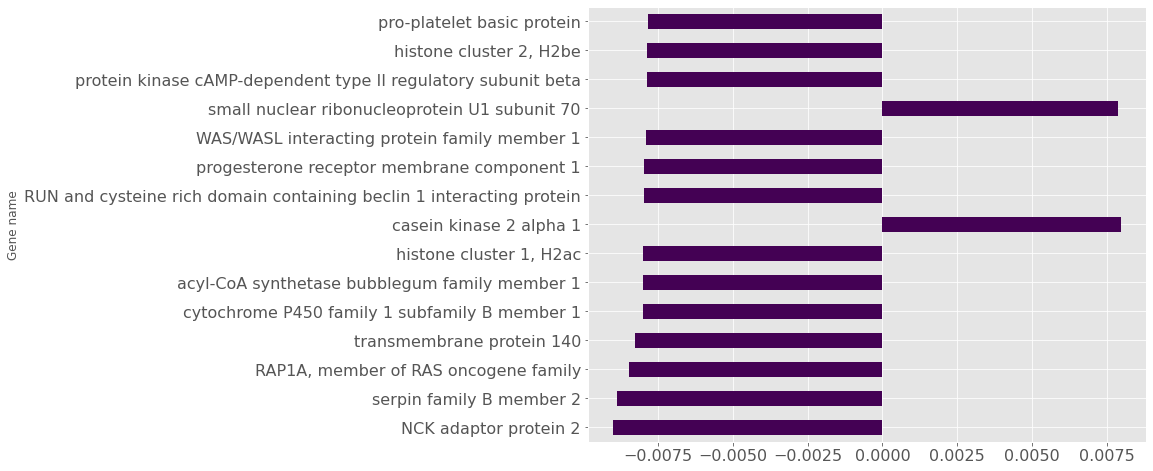

In [578]:
#Top 15 genes that are both upregulated and downregulated between CD and NM samples

coefs.set_index('Gene name').sort_values(by='ABS', ascending=False).head(15)['coefs'].plot(kind='barh', fontsize = 16, figsize = (10, 8), cmap='viridis');

In [579]:
compare_cd = pd.DataFrame(list(zip(compare_cd.index, geo_cd_10)), columns=['LR Differential/CD vs NM', 'Bioconductor Differential/CD vs NM'])
compare_cd.head(10)

,LR Differential/CD vs NM,Bioconductor Differential/CD vs NM
0,NCK adaptor protein 2,"histone cluster 1, H2ac"
1,serpin family B member 2,"histone cluster 1, H2bk"
2,"RAP1A, member of RAS oncogene family",progesterone receptor membrane component 1
3,transmembrane protein 140,serpin family B member 2
4,cytochrome P450 family 1 subfamily B member 1,"histone cluster 2, H2be"
5,acyl-CoA synthetase bubblegum family member 1,monocyte to macrophage differentiation associated
6,"histone cluster 1, H2ac",brain abundant membrane attached signal protein 1
7,casein kinase 2 alpha 1,transmembrane protein 158 (gene/pseudogene)
8,RUN and cysteine rich domain containing beclin...,"histone cluster 1, H2bd"
9,progesterone receptor membrane component 1,amyloid beta precursor protein


### Summary of Logisitic Regression Analysis




| Logistic Regression (default) 	| Baseline 	| Train 	| Test 	|
|:-----------------------------:	|:--------:	|:-----:	|:----:	|
|       UC vs NM with PCA       	|   0.62   	|  1.0  	|  1.0 	|
|       UC vs NM All Genes      	|   0.62   	|  1.0  	|  1.0 	|
|       CD vs NM with PCA       	|   0.58   	|  1.0  	| 0.88 	|
|       CD vs NM All Genes      	|   0.58   	|  1.0  	| 0.92 	|